In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import seaborn as sns
sns.set()
#sns.set_palette("Set1")
#sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

## 1.1 The iris datase

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
list_of_species = list(set(iris.species))
print(list_of_species)

['versicolor', 'setosa', 'virginica']


In [5]:
iris.shape

(150, 5)

In [6]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

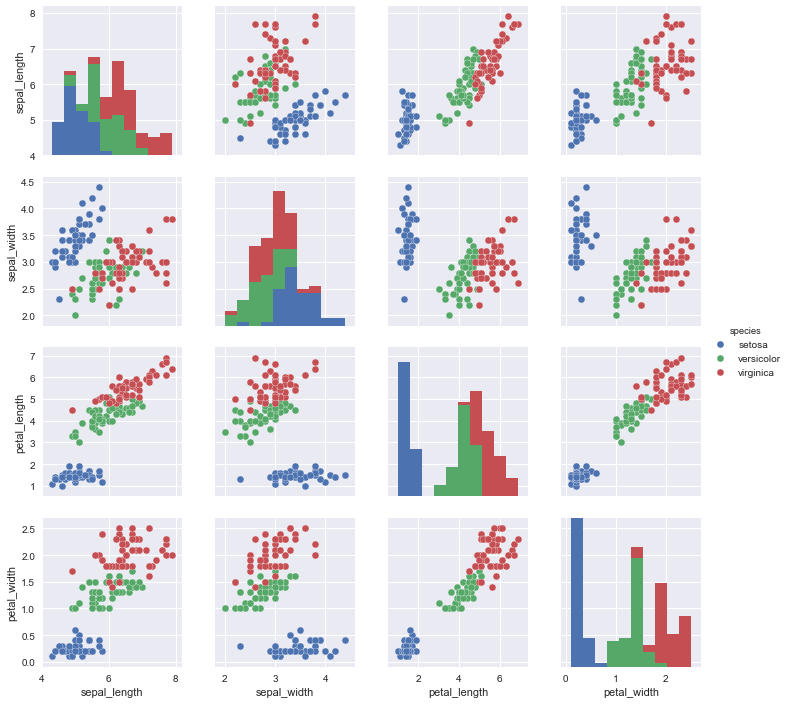

In [7]:
sns.pairplot(iris, hue="species");

In [8]:
def plot_histogram(my_species,feature,n_bins=20,normed=None,data=iris):
    """Plot a histogram of the given feature according to a given species."""
    mask = data['species']==my_species
    hist0 = data[feature][~mask]
    hist1 = data[feature][mask]
    histograms = [hist0,hist1]
    labels = ['not '+my_species, my_species]
    fig,ax = plt.subplots(figsize=(12,5))
    plt.hist(histograms, histtype='bar',bins=n_bins,normed=normed,label=labels);
    plt.title(my_species,fontsize='xx-large')
    plt.xlabel(feature,fontsize='x-large')
    plt.legend(fontsize='x-large')
    ax.tick_params(labelsize='large')

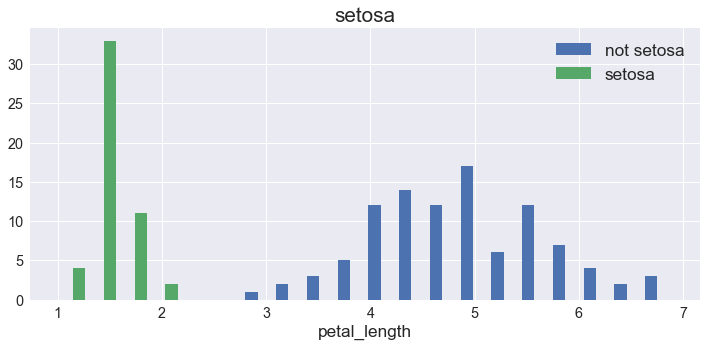

In [9]:
plot_histogram('setosa','petal_length')

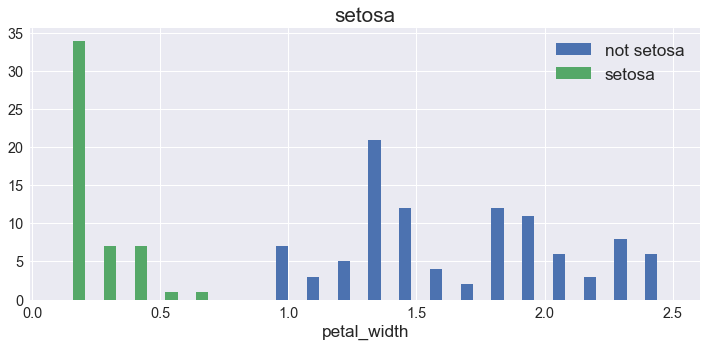

In [10]:
plot_histogram('setosa','petal_width')

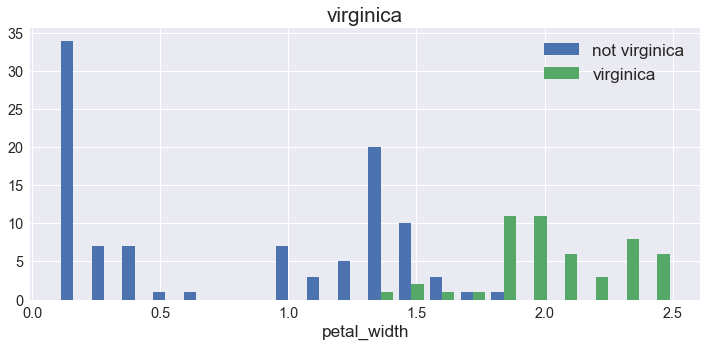

In [11]:
plot_histogram('virginica','petal_width')

# Problem we want to address: knowing the petal width, predict if the iris is a virginica

## 1.2 Logistic regression with sklearn: guessing virginica knowing the petal width

In [12]:
x = iris['petal_width'].reshape(-1,1)

In [13]:
y = iris.species.apply(lambda x: 1 if x=='virginica' else 0)

In [192]:
import sklearn.model_selection
import sklearn.linear_model
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=42)

In [15]:
model_sklearn = sklearn.linear_model.LogisticRegression()

In [16]:
model_sklearn.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

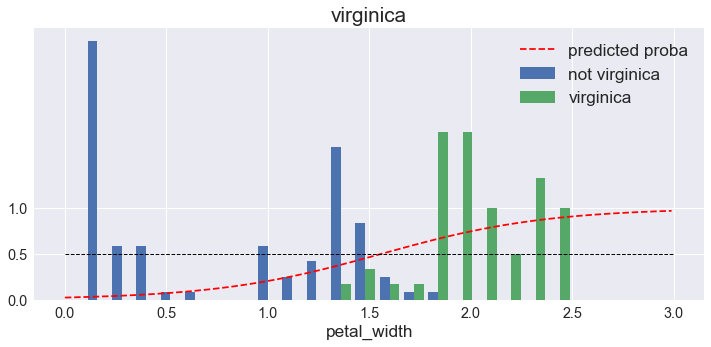

In [17]:
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
predicted_proba = model_sklearn.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths,predicted_proba,'r--',label='predicted proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend(fontsize='x-large')
plt.yticks([0,0.5,1]);

In [18]:
accuracy_train = model_sklearn.score(x_train,y_train)
print(accuracy_train)
# normally the score should be 0.958333 = 115/120
# knowing that there are 5 misclassified, on a total of 120=x_train.shape[0]

0.941666666667


In [19]:
# prediction_train = logistic_classifier.predict_proba(x)
# loss_train = sklearn.metrics.log_loss(y,prediction_train)
# print(loss_train)

In [20]:
accuracy_test = model_sklearn.score(x_test,y_test)
print(accuracy_test)

0.966666666667


In [21]:
# prediction_test = logistic_classifier.predict_proba(x)
# test_loss = sklearn.metrics.log_loss(y,prediction_test)
# print(test_loss)

In [22]:
print('coefficients:',model_sklearn.coef_ , model_sklearn.intercept_)
#model_sklearn.predict_proba([[1.]])

coefficients: [[ 2.44921865]] [-3.82088392]


# Keras

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


In [24]:
model_keras = Sequential()

In [25]:
layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1))
model_keras.add(layer0)

In [26]:
layer1 = Activation('sigmoid')
model_keras.add(layer1)

In [27]:
model_keras.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#log_classifier.evaluate(x,y)

In [28]:
def initialize_keras(reg = .1):
    model_keras = Sequential()
    layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(reg))
    model_keras.add(layer0)
    layer1 = Activation('sigmoid')
    model_keras.add(layer1)
    sgd = optimizers.SGD(lr=0.05)
    model_keras.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
    return model_keras

In [29]:
model_keras.fit(x_train,y_train,epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 521us/step - loss: 1.0334 - acc: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 79us/step - loss: 1.0127 - acc: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 87us/step - loss: 0.9930 - acc: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 93us/step - loss: 0.9740 - acc: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 91us/step - loss: 0.9557 - acc: 0.3667
Epoch 6/100
120/120 [==============================] - 0s 83us/step - loss: 0.9379 - acc: 0.3667
Epoch 7/100
120/120 [==============================] - 0s 90us/step - loss: 0.9206 - acc: 0.3667
Epoch 8/100
120/120 [==============================] - 0s 85us/step - loss: 0.9044 - acc: 0.4000
Epoch 9/100
120/120 [==============================] - 0s 80us/step - loss: 0.8881 - acc: 0.4000
Epoch 10/100
120/120 [==============================] - 0s 91us/step - loss: 0.8728 - acc: 0.4000
Epoch 11/100
120/120 [======

120/120 [==============================] - 0s 76us/step - loss: 0.5741 - acc: 0.9167
Epoch 85/100
120/120 [==============================] - 0s 81us/step - loss: 0.5737 - acc: 0.9167
Epoch 86/100
120/120 [==============================] - 0s 76us/step - loss: 0.5732 - acc: 0.9167
Epoch 87/100
120/120 [==============================] - 0s 93us/step - loss: 0.5727 - acc: 0.9167
Epoch 88/100
120/120 [==============================] - 0s 97us/step - loss: 0.5724 - acc: 0.9500
Epoch 89/100
120/120 [==============================] - 0s 74us/step - loss: 0.5720 - acc: 0.9417
Epoch 90/100
120/120 [==============================] - 0s 71us/step - loss: 0.5715 - acc: 0.9417
Epoch 91/100
120/120 [==============================] - 0s 64us/step - loss: 0.5712 - acc: 0.9417
Epoch 92/100
120/120 [==============================] - 0s 71us/step - loss: 0.5708 - acc: 0.9417
Epoch 93/100
120/120 [==============================] - 0s 98us/step - loss: 0.5705 - acc: 0.9417
Epoch 94/100
120/120 [===========

In [30]:
model_keras.evaluate(x,y,verbose=0)

[0.56808623234430944, 0.94666667064030963]

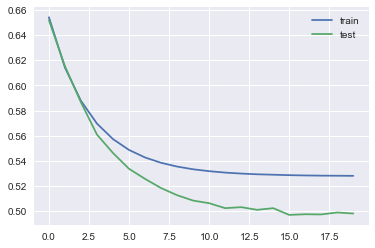

In [31]:
model_keras = initialize_keras()
num_steps = 20
epochs = 10
steps = range(num_steps)
loss = np.zeros(num_steps)
loss_test = np.zeros_like(loss)
for i in steps:
    model_keras.fit(x_train,y_train,epochs=epochs,verbose=0)
    loss[i] = model_keras.evaluate(x_train,y_train,verbose=0)[0]
    loss_test[i] = model_keras.evaluate(x_test,y_test,verbose=0)[0]
    
plt.plot(steps,loss,label='train')
plt.plot(steps,loss_test,label='test')
plt.legend()

In [32]:
w = model_keras.get_weights()

In [33]:
w

[array([[ 0.86927044]], dtype=float32), array([-1.64135468], dtype=float32)]

In [34]:
# log_classifier.predict(x)
# returns an array of shape (-1,1)

WITH REGULARIZATION = .1 THE PROBAS CURVE IS MUCH FLATTER (HOWEVER EPOCHS LARGE IS)THAN WITH SKLEARN

ONE NEEDS REG = .01 AND 5000 EPOCHS TO GET THE SAME CURVE AS WITH SKLEARN

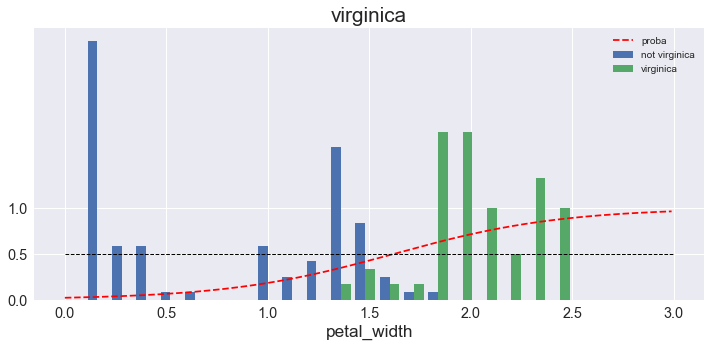

In [35]:
model_keras = initialize_keras(reg=.01)
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
model_keras.fit(x_train,y_train,epochs=500,verbose=0)
predicted_proba = model_keras.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,predicted_proba,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend()
plt.yticks([0,0.5,1]);

## The sigmoid function

Here the logistic regression algorithm does the following: try to find a function 
$$ P_{normal} : [0,100] \to [0,1]$$
such that for a random value of a coordinate $x \in [0,100]$,   

$ P_{normal}(x)$ is an estimate (= a guess) of the probability that the traffic is slow.

The idea of logistic regression is to look for a function of the form:
$$ P_{normal}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

In [36]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

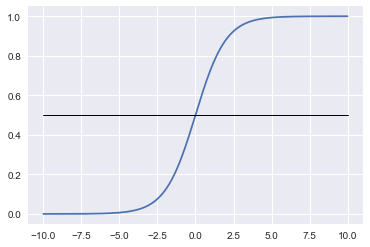

In [37]:
x_sigmoid = np.arange(-10,10,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.plot([-10,10],[0.5,0.5],'k-',linewidth=1)

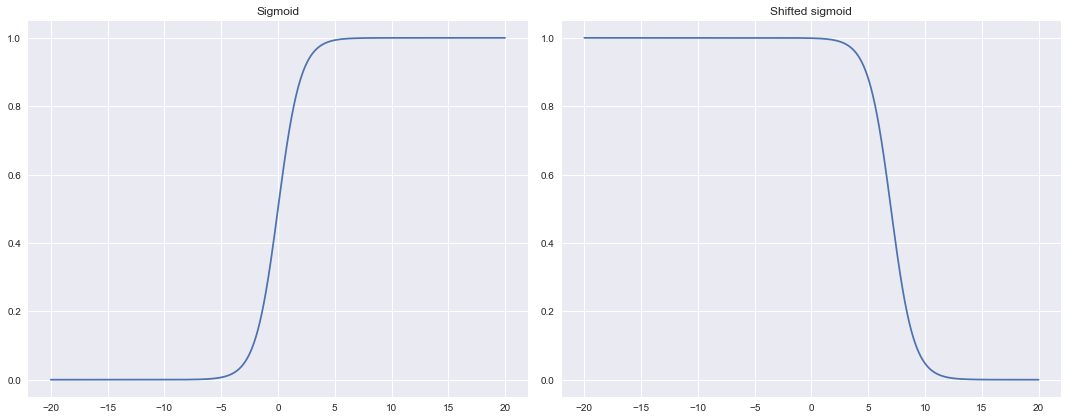

In [38]:
plt.figure(figsize=(15,6))

plt.subplot(121)
x_sigmoid = np.arange(-20,20,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.title('Sigmoid')
plt.subplot(122)
w = -1
b = 7
y_shifted = sigmoid(w*x_sigmoid + b)
_ = plt.plot(x_sigmoid,y_shifted)
plt.title('Shifted sigmoid')
plt.tight_layout()

Ajouter graphe du reseau neronal

Definir accuracy

# (Section 2) Gradient descent

# Optimization, gradient descent with Keras

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model
from keras import optimizers
from keras import regularizers

In [40]:
model = Sequential()
model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
model.add(Activation('sigmoid'))

sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy
#x_grid, y_grid = get_meshgrid(0,5,.1,-10,0,.1)
x_grid, y_grid = get_meshgrid(-10,10,.1,-10,10,.1)

In [ ]:
print(model.metrics_names)

In [ ]:
model.evaluate(x_train,y_train)

## Plot accuracy

In [42]:
def get_accuracy(model,weight,bias,x,y,C=1.):
    """Compute the accuracy function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(x,y,verbose=0)[1]
    return accuracy

def get_accuracy1(weigth,bias):
    return get_accuracy(model,weigth,bias,x_train,y_train,1.)

vaccuracy = np.vectorize(get_accuracy1)

In [44]:
#takes two minutes to run
# acc_grid = vaccuracy(x_grid,y_grid)

In [49]:
# import pickle
# with open('../data/acc_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(acc_grid, f)

In [50]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

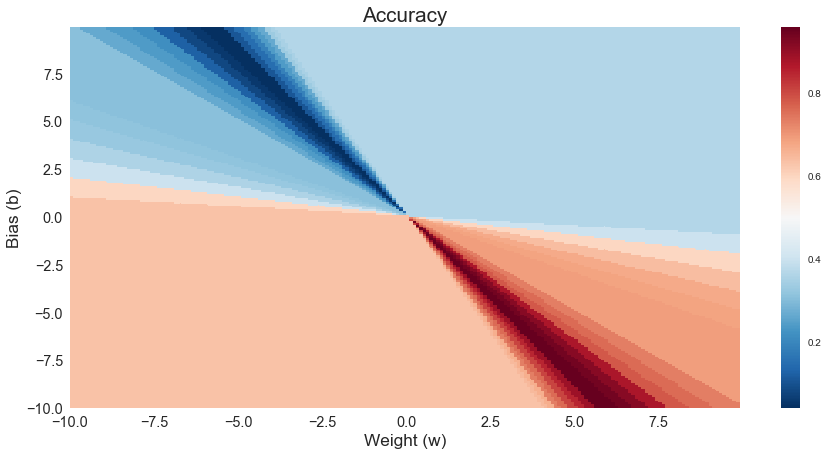

In [86]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid,y_grid,acc_grid,cmap='RdBu_r')
plt.colorbar()
plt.title('Accuracy',fontsize='xx-large')
plt.xlabel('Weight (w)',fontsize='x-large')
plt.ylabel('Bias (b)',fontsize='x-large')
ax_acc.tick_params(labelsize='large')

## The loss function

$$\mathcal{L}(p,y) = y \log(p) + (1-y)\log(1-p)$$
$$\mathcal{L} = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$

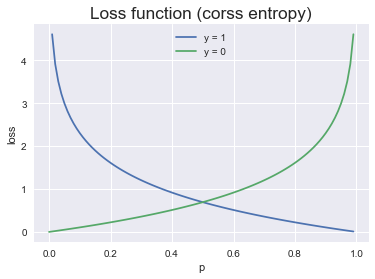

In [54]:
pp = np.arange(0,1,.01)
loss1 = - np.log(pp)
loss0 = -np.log(1-pp)
plt.plot(pp,loss1,label='y = 1')
plt.plot(pp,loss0,label='y = 0')
plt.xlabel('p')
plt.ylabel('loss')
plt.title('Loss function (corss entropy)',fontsize='x-large')
_=plt.legend()

In [81]:
def initialise_keras_model(initial_weight = 9,initial_bias = 9,lr=0.05,reg=.1):
    model = Sequential()
    model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[initial_weight]]) , np.array([initial_bias]) ] ) 
    return model

In [72]:
def get_loss(model,weight,bias,x,y,C=1.):
    """Compute the loss function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(x,y,verbose=0)[0]
    return loss

def get_loss1(weigth,bias):
    return get_loss(model,weigth,bias,x_train,y_train,1.)

vloss = np.vectorize(get_loss1)

In [73]:
# loss_grid = vloss(x_grid,y_grid)

In [74]:
# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [75]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    loss_grid =pickle.load(f)

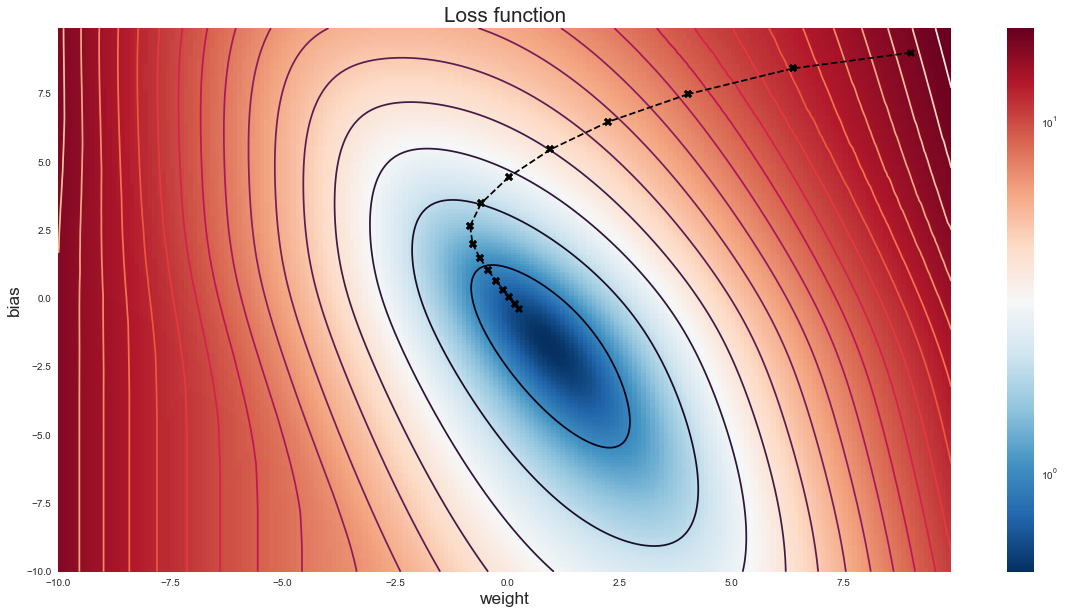

In [87]:
fig , ax_loss = plt.subplots(figsize=(20,10))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function',fontsize='xx-large')
plt.xlabel('weight',fontsize='x-large')
plt.ylabel('bias',fontsize='x-large')

model = initialise_keras_model(reg=.05)
steps = 15
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(x_train,y_train,verbose=0,epochs = 8)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

In [ ]:
#history = model.fit(x_train,y_train,epochs=10,verbose=0)
# model.get_weights()
# loss = model.evaluate(x_train,y_train,verbose=0)[0]
# model.test_on_batch(x_train,y_train)
# model.train_on_batch(x_train,y_train)
# model.get_weights()

# (Section 3) Neural Networks: when linear methods are not sufficient

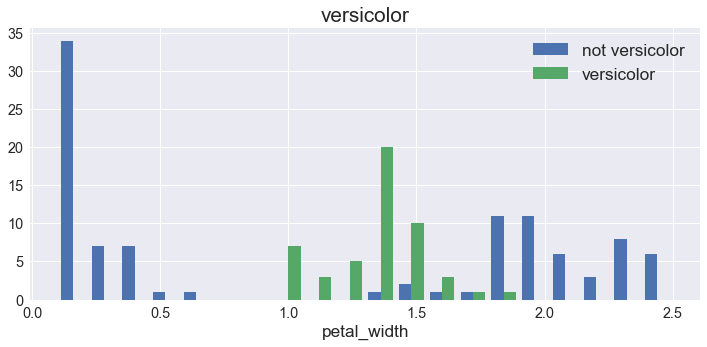

In [120]:
plot_histogram('versicolor','petal_width')

In [128]:
#plot_histogram('versicolor','sepal_length')

#plot_histogram('versicolor','sepal_width')

#plot_histogram('versicolor','petal_length')

### Goal: determine if an iris is a versicolor knowing its petal width

In [141]:
x = iris.petal_width
y = iris.species.apply(lambda x: 1 if x=='versicolor' else 0)
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [155]:
model_versicolor = Sequential()
model_versicolor.add(Dense(1, input_dim=1 , kernel_regularizer=regularizers.l2(.1)))
model_versicolor.add(Activation('sigmoid'))
model_versicolor.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model_versicolor.fit(x_train,y_train,epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 0.7002 - acc: 0.6917
Epoch 2/100
120/120 [==============================] - 0s 74us/step - loss: 0.6983 - acc: 0.6917
Epoch 3/100
120/120 [==============================] - 0s 78us/step - loss: 0.6965 - acc: 0.6917
Epoch 4/100
120/120 [==============================] - 0s 79us/step - loss: 0.6949 - acc: 0.6917
Epoch 5/100
120/120 [==============================] - 0s 102us/step - loss: 0.6933 - acc: 0.6917
Epoch 6/100
120/120 [==============================] - 0s 95us/step - loss: 0.6917 - acc: 0.6917
Epoch 7/100
120/120 [==============================] - 0s 86us/step - loss: 0.6902 - acc: 0.6917
Epoch 8/100
120/120 [==============================] - 0s 82us/step - loss: 0.6887 - acc: 0.6917
Epoch 9/100
120/120 [==============================] - 0s 98us/step - loss: 0.6874 - acc: 0.6917
Epoch 10/100
120/120 [==============================] - 0s 92us/step - loss: 0.6862 - acc: 0.6917
Epoch 11/100
120/120 [=======

120/120 [==============================] - 0s 99us/step - loss: 0.6489 - acc: 0.6917
Epoch 84/100
120/120 [==============================] - 0s 79us/step - loss: 0.6485 - acc: 0.6917
Epoch 85/100
120/120 [==============================] - 0s 81us/step - loss: 0.6482 - acc: 0.6917
Epoch 86/100
120/120 [==============================] - 0s 92us/step - loss: 0.6479 - acc: 0.6917
Epoch 87/100
120/120 [==============================] - 0s 87us/step - loss: 0.6477 - acc: 0.6917
Epoch 88/100
120/120 [==============================] - 0s 134us/step - loss: 0.6475 - acc: 0.6917
Epoch 89/100
120/120 [==============================] - 0s 86us/step - loss: 0.6472 - acc: 0.6917
Epoch 90/100
120/120 [==============================] - 0s 85us/step - loss: 0.6470 - acc: 0.6917
Epoch 91/100
120/120 [==============================] - 0s 92us/step - loss: 0.6467 - acc: 0.6917
Epoch 92/100
120/120 [==============================] - 0s 88us/step - loss: 0.6465 - acc: 0.6917
Epoch 93/100
120/120 [==========

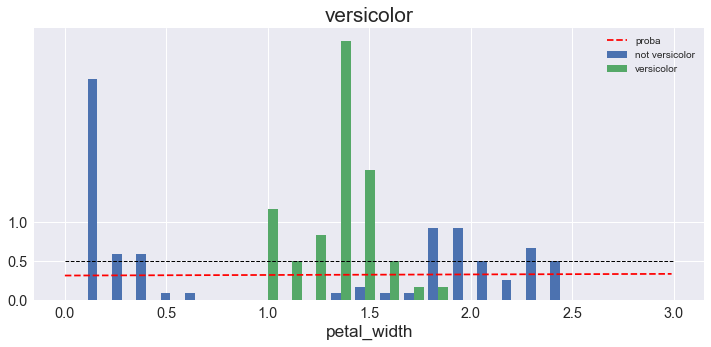

In [157]:
plot_histogram('versicolor','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
model_versicolor.fit(x_train,y_train,epochs=500,verbose=0)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend()
plt.yticks([0,0.5,1]);

In [177]:
model_versicolor = Sequential()
model_versicolor.add(Dense(10, input_dim=1 ) )
model_versicolor.add(Activation('sigmoid'))
model_versicolor.add(Dense(1, input_dim=1 ) )
model_versicolor.add(Activation('sigmoid'))
sgd = optimizers.SGD(lr=0.05)
model_versicolor.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
def initialize_versicolor_model(lr = .05):
    model_versicolor = Sequential()
    model_versicolor.add(Dense(10, input_dim=1 ) )
    model_versicolor.add(Activation('sigmoid'))
    model_versicolor.add(Dense(1, input_dim=1 ) )
    model_versicolor.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model_versicolor.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    return model_versicolor

In [162]:
model_versicolor.fit(x_train,y_train,epochs=5000)

Epoch 1/5000
120/120 [==============================] - 0s 83us/step - loss: 0.5441 - acc: 0.6917
Epoch 2/5000
120/120 [==============================] - 0s 85us/step - loss: 0.5434 - acc: 0.6917
Epoch 3/5000
120/120 [==============================] - 0s 84us/step - loss: 0.5432 - acc: 0.6917
Epoch 4/5000
120/120 [==============================] - 0s 90us/step - loss: 0.5440 - acc: 0.6917
Epoch 5/5000
120/120 [==============================] - 0s 88us/step - loss: 0.5429 - acc: 0.6917
Epoch 6/5000
120/120 [==============================] - 0s 90us/step - loss: 0.5429 - acc: 0.6917
Epoch 7/5000
120/120 [==============================] - 0s 84us/step - loss: 0.5429 - acc: 0.6917
Epoch 8/5000
120/120 [==============================] - 0s 93us/step - loss: 0.5425 - acc: 0.6917
Epoch 9/5000
120/120 [==============================] - 0s 80us/step - loss: 0.5423 - acc: 0.6917
Epoch 10/5000
120/120 [==============================] - 0s 86us/step - loss: 0.5420 - acc: 0.6917
Epoch 11/5000
120/1

120/120 [==============================] - 0s 71us/step - loss: 0.5292 - acc: 0.6917
Epoch 82/5000
120/120 [==============================] - 0s 67us/step - loss: 0.5295 - acc: 0.6917
Epoch 83/5000
120/120 [==============================] - 0s 74us/step - loss: 0.5287 - acc: 0.6917
Epoch 84/5000
120/120 [==============================] - 0s 104us/step - loss: 0.5286 - acc: 0.6917
Epoch 85/5000
120/120 [==============================] - 0s 78us/step - loss: 0.5288 - acc: 0.6917
Epoch 86/5000
120/120 [==============================] - 0s 111us/step - loss: 0.5289 - acc: 0.6917
Epoch 87/5000
120/120 [==============================] - 0s 108us/step - loss: 0.5280 - acc: 0.6917
Epoch 88/5000
120/120 [==============================] - 0s 71us/step - loss: 0.5283 - acc: 0.6917
Epoch 89/5000
120/120 [==============================] - 0s 86us/step - loss: 0.5279 - acc: 0.6917
Epoch 90/5000
120/120 [==============================] - 0s 87us/step - loss: 0.5276 - acc: 0.6917
Epoch 91/5000
120/120

120/120 [==============================] - 0s 73us/step - loss: 0.5147 - acc: 0.6917
Epoch 162/5000
120/120 [==============================] - 0s 84us/step - loss: 0.5140 - acc: 0.6917
Epoch 163/5000
120/120 [==============================] - 0s 108us/step - loss: 0.5138 - acc: 0.6917
Epoch 164/5000
120/120 [==============================] - 0s 68us/step - loss: 0.5140 - acc: 0.6917
Epoch 165/5000
120/120 [==============================] - 0s 78us/step - loss: 0.5142 - acc: 0.6917
Epoch 166/5000
120/120 [==============================] - 0s 63us/step - loss: 0.5134 - acc: 0.6917
Epoch 167/5000
120/120 [==============================] - 0s 77us/step - loss: 0.5134 - acc: 0.6917
Epoch 168/5000
120/120 [==============================] - 0s 84us/step - loss: 0.5134 - acc: 0.6917
Epoch 169/5000
120/120 [==============================] - 0s 95us/step - loss: 0.5125 - acc: 0.6917
Epoch 170/5000
120/120 [==============================] - 0s 98us/step - loss: 0.5130 - acc: 0.6917
Epoch 171/5000

120/120 [==============================] - 0s 78us/step - loss: 0.4984 - acc: 0.6917
Epoch 242/5000
120/120 [==============================] - 0s 79us/step - loss: 0.4987 - acc: 0.6917
Epoch 243/5000
120/120 [==============================] - 0s 76us/step - loss: 0.4984 - acc: 0.6917
Epoch 244/5000
120/120 [==============================] - 0s 89us/step - loss: 0.4979 - acc: 0.6917
Epoch 245/5000
120/120 [==============================] - 0s 77us/step - loss: 0.4984 - acc: 0.6917
Epoch 246/5000
120/120 [==============================] - 0s 103us/step - loss: 0.4978 - acc: 0.6917
Epoch 247/5000
120/120 [==============================] - 0s 95us/step - loss: 0.4972 - acc: 0.6917
Epoch 248/5000
120/120 [==============================] - 0s 90us/step - loss: 0.4973 - acc: 0.6917
Epoch 249/5000
120/120 [==============================] - 0s 79us/step - loss: 0.4970 - acc: 0.6917
Epoch 250/5000
120/120 [==============================] - 0s 86us/step - loss: 0.4965 - acc: 0.6917
Epoch 251/5000

120/120 [==============================] - 0s 114us/step - loss: 0.4819 - acc: 0.6917
Epoch 323/5000
120/120 [==============================] - 0s 89us/step - loss: 0.4822 - acc: 0.6917
Epoch 324/5000
120/120 [==============================] - 0s 85us/step - loss: 0.4825 - acc: 0.6917
Epoch 325/5000
120/120 [==============================] - 0s 109us/step - loss: 0.4812 - acc: 0.6917
Epoch 326/5000
120/120 [==============================] - 0s 95us/step - loss: 0.4809 - acc: 0.6917
Epoch 327/5000
120/120 [==============================] - 0s 76us/step - loss: 0.4809 - acc: 0.6917
Epoch 328/5000
120/120 [==============================] - 0s 85us/step - loss: 0.4810 - acc: 0.6917
Epoch 329/5000
120/120 [==============================] - 0s 104us/step - loss: 0.4812 - acc: 0.6917
Epoch 330/5000
120/120 [==============================] - 0s 106us/step - loss: 0.4804 - acc: 0.6917
Epoch 331/5000
120/120 [==============================] - 0s 81us/step - loss: 0.4809 - acc: 0.6917
Epoch 332/5

120/120 [==============================] - 0s 94us/step - loss: 0.4653 - acc: 0.6917
Epoch 403/5000
120/120 [==============================] - 0s 101us/step - loss: 0.4646 - acc: 0.6917
Epoch 404/5000
120/120 [==============================] - 0s 82us/step - loss: 0.4651 - acc: 0.6917
Epoch 405/5000
120/120 [==============================] - 0s 112us/step - loss: 0.4642 - acc: 0.6917
Epoch 406/5000
120/120 [==============================] - 0s 107us/step - loss: 0.4640 - acc: 0.6917
Epoch 407/5000
120/120 [==============================] - 0s 85us/step - loss: 0.4636 - acc: 0.6917
Epoch 408/5000
120/120 [==============================] - 0s 82us/step - loss: 0.4640 - acc: 0.6917
Epoch 409/5000
120/120 [==============================] - 0s 85us/step - loss: 0.4633 - acc: 0.6917
Epoch 410/5000
120/120 [==============================] - 0s 71us/step - loss: 0.4629 - acc: 0.6917
Epoch 411/5000
120/120 [==============================] - 0s 80us/step - loss: 0.4629 - acc: 0.6917
Epoch 412/50

120/120 [==============================] - 0s 82us/step - loss: 0.4469 - acc: 0.6917
Epoch 484/5000
120/120 [==============================] - 0s 84us/step - loss: 0.4466 - acc: 0.6917
Epoch 485/5000
120/120 [==============================] - 0s 79us/step - loss: 0.4468 - acc: 0.6917
Epoch 486/5000
120/120 [==============================] - 0s 69us/step - loss: 0.4463 - acc: 0.6917
Epoch 487/5000
120/120 [==============================] - 0s 89us/step - loss: 0.4462 - acc: 0.6917
Epoch 488/5000
120/120 [==============================] - 0s 98us/step - loss: 0.4458 - acc: 0.6917
Epoch 489/5000
120/120 [==============================] - 0s 89us/step - loss: 0.4459 - acc: 0.6917
Epoch 490/5000
120/120 [==============================] - 0s 84us/step - loss: 0.4457 - acc: 0.6917
Epoch 491/5000
120/120 [==============================] - 0s 96us/step - loss: 0.4455 - acc: 0.6917
Epoch 492/5000
120/120 [==============================] - 0s 85us/step - loss: 0.4452 - acc: 0.6917
Epoch 493/5000


120/120 [==============================] - 0s 94us/step - loss: 0.4286 - acc: 0.6917
Epoch 565/5000
120/120 [==============================] - 0s 83us/step - loss: 0.4296 - acc: 0.6917
Epoch 566/5000
120/120 [==============================] - 0s 77us/step - loss: 0.4286 - acc: 0.7167
Epoch 567/5000
120/120 [==============================] - 0s 73us/step - loss: 0.4278 - acc: 0.7083
Epoch 568/5000
120/120 [==============================] - 0s 88us/step - loss: 0.4282 - acc: 0.7500
Epoch 569/5000
120/120 [==============================] - ETA: 0s - loss: 0.4688 - acc: 0.718 - 0s 100us/step - loss: 0.4279 - acc: 0.7000
Epoch 570/5000
120/120 [==============================] - 0s 84us/step - loss: 0.4272 - acc: 0.6917
Epoch 571/5000
120/120 [==============================] - 0s 89us/step - loss: 0.4269 - acc: 0.7250
Epoch 572/5000
120/120 [==============================] - 0s 86us/step - loss: 0.4267 - acc: 0.7000
Epoch 573/5000
120/120 [==============================] - 0s 75us/step - los

120/120 [==============================] - 0s 103us/step - loss: 0.4097 - acc: 0.8500
Epoch 646/5000
120/120 [==============================] - 0s 91us/step - loss: 0.4096 - acc: 0.8167
Epoch 647/5000
120/120 [==============================] - 0s 114us/step - loss: 0.4097 - acc: 0.8750
Epoch 648/5000
120/120 [==============================] - 0s 93us/step - loss: 0.4097 - acc: 0.8500
Epoch 649/5000
120/120 [==============================] - 0s 98us/step - loss: 0.4101 - acc: 0.8583
Epoch 650/5000
120/120 [==============================] - 0s 122us/step - loss: 0.4085 - acc: 0.8750
Epoch 651/5000
120/120 [==============================] - 0s 83us/step - loss: 0.4090 - acc: 0.8750
Epoch 652/5000
120/120 [==============================] - 0s 96us/step - loss: 0.4083 - acc: 0.8750
Epoch 653/5000
120/120 [==============================] - 0s 108us/step - loss: 0.4077 - acc: 0.8750
Epoch 654/5000
120/120 [==============================] - 0s 97us/step - loss: 0.4075 - acc: 0.8750
Epoch 655/5

120/120 [==============================] - 0s 99us/step - loss: 0.3912 - acc: 0.9083
Epoch 727/5000
120/120 [==============================] - 0s 108us/step - loss: 0.3903 - acc: 0.9167
Epoch 728/5000
120/120 [==============================] - 0s 96us/step - loss: 0.3909 - acc: 0.9083
Epoch 729/5000
120/120 [==============================] - 0s 101us/step - loss: 0.3900 - acc: 0.9167
Epoch 730/5000
120/120 [==============================] - 0s 97us/step - loss: 0.3908 - acc: 0.9167
Epoch 731/5000
120/120 [==============================] - 0s 104us/step - loss: 0.3897 - acc: 0.9167
Epoch 732/5000
120/120 [==============================] - 0s 96us/step - loss: 0.3892 - acc: 0.9167
Epoch 733/5000
120/120 [==============================] - 0s 80us/step - loss: 0.3891 - acc: 0.9167
Epoch 734/5000
120/120 [==============================] - 0s 72us/step - loss: 0.3888 - acc: 0.9167
Epoch 735/5000
120/120 [==============================] - 0s 78us/step - loss: 0.3886 - acc: 0.9167
Epoch 736/50

120/120 [==============================] - 0s 85us/step - loss: 0.3715 - acc: 0.9167
Epoch 808/5000
120/120 [==============================] - 0s 124us/step - loss: 0.3709 - acc: 0.9167
Epoch 809/5000
120/120 [==============================] - 0s 90us/step - loss: 0.3707 - acc: 0.9167
Epoch 810/5000
120/120 [==============================] - 0s 97us/step - loss: 0.3705 - acc: 0.9167
Epoch 811/5000
120/120 [==============================] - 0s 102us/step - loss: 0.3704 - acc: 0.9167
Epoch 812/5000
120/120 [==============================] - 0s 145us/step - loss: 0.3700 - acc: 0.9167
Epoch 813/5000
120/120 [==============================] - 0s 89us/step - loss: 0.3700 - acc: 0.9167
Epoch 814/5000
120/120 [==============================] - 0s 71us/step - loss: 0.3697 - acc: 0.9167
Epoch 815/5000
120/120 [==============================] - 0s 82us/step - loss: 0.3691 - acc: 0.9167
Epoch 816/5000
120/120 [==============================] - 0s 123us/step - loss: 0.3692 - acc: 0.9167
Epoch 817/5

120/120 [==============================] - 0s 103us/step - loss: 0.3520 - acc: 0.9333
Epoch 888/5000
120/120 [==============================] - 0s 86us/step - loss: 0.3524 - acc: 0.9250
Epoch 889/5000
120/120 [==============================] - 0s 77us/step - loss: 0.3517 - acc: 0.9333
Epoch 890/5000
120/120 [==============================] - 0s 109us/step - loss: 0.3514 - acc: 0.9333
Epoch 891/5000
120/120 [==============================] - 0s 104us/step - loss: 0.3513 - acc: 0.9417
Epoch 892/5000
120/120 [==============================] - 0s 98us/step - loss: 0.3510 - acc: 0.9417
Epoch 893/5000
120/120 [==============================] - 0s 93us/step - loss: 0.3509 - acc: 0.9250
Epoch 894/5000
120/120 [==============================] - 0s 79us/step - loss: 0.3506 - acc: 0.9417
Epoch 895/5000
120/120 [==============================] - 0s 99us/step - loss: 0.3505 - acc: 0.9417
Epoch 896/5000
120/120 [==============================] - 0s 96us/step - loss: 0.3501 - acc: 0.9167
Epoch 897/50

120/120 [==============================] - 0s 92us/step - loss: 0.3335 - acc: 0.9417
Epoch 967/5000
120/120 [==============================] - 0s 89us/step - loss: 0.3333 - acc: 0.9417
Epoch 968/5000
120/120 [==============================] - 0s 87us/step - loss: 0.3333 - acc: 0.9417
Epoch 969/5000
120/120 [==============================] - 0s 113us/step - loss: 0.3329 - acc: 0.9417
Epoch 970/5000
120/120 [==============================] - 0s 92us/step - loss: 0.3332 - acc: 0.9417
Epoch 971/5000
120/120 [==============================] - 0s 74us/step - loss: 0.3322 - acc: 0.9417
Epoch 972/5000
120/120 [==============================] - 0s 83us/step - loss: 0.3324 - acc: 0.9417
Epoch 973/5000
120/120 [==============================] - 0s 93us/step - loss: 0.3323 - acc: 0.9417
Epoch 974/5000
120/120 [==============================] - 0s 109us/step - loss: 0.3321 - acc: 0.9417
Epoch 975/5000
120/120 [==============================] - 0s 99us/step - loss: 0.3315 - acc: 0.9417
Epoch 976/500

120/120 [==============================] - 0s 133us/step - loss: 0.3163 - acc: 0.9417
Epoch 1046/5000
120/120 [==============================] - 0s 147us/step - loss: 0.3152 - acc: 0.9417
Epoch 1047/5000
120/120 [==============================] - 0s 113us/step - loss: 0.3148 - acc: 0.9417
Epoch 1048/5000
120/120 [==============================] - 0s 129us/step - loss: 0.3147 - acc: 0.9417
Epoch 1049/5000
120/120 [==============================] - 0s 103us/step - loss: 0.3143 - acc: 0.9417
Epoch 1050/5000
120/120 [==============================] - 0s 134us/step - loss: 0.3143 - acc: 0.9417
Epoch 1051/5000
120/120 [==============================] - 0s 147us/step - loss: 0.3146 - acc: 0.9417
Epoch 1052/5000
120/120 [==============================] - 0s 125us/step - loss: 0.3144 - acc: 0.9417
Epoch 1053/5000
120/120 [==============================] - 0s 93us/step - loss: 0.3137 - acc: 0.9417
Epoch 1054/5000
120/120 [==============================] - 0s 99us/step - loss: 0.3136 - acc: 0.941

120/120 [==============================] - 0s 102us/step - loss: 0.2980 - acc: 0.9417
Epoch 1126/5000
120/120 [==============================] - 0s 125us/step - loss: 0.2975 - acc: 0.9417
Epoch 1127/5000
120/120 [==============================] - 0s 90us/step - loss: 0.2975 - acc: 0.9417
Epoch 1128/5000
120/120 [==============================] - 0s 110us/step - loss: 0.2970 - acc: 0.9417
Epoch 1129/5000
120/120 [==============================] - 0s 88us/step - loss: 0.2968 - acc: 0.9417
Epoch 1130/5000
120/120 [==============================] - 0s 109us/step - loss: 0.2966 - acc: 0.9417
Epoch 1131/5000
120/120 [==============================] - 0s 91us/step - loss: 0.2969 - acc: 0.9417
Epoch 1132/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2970 - acc: 0.9417
Epoch 1133/5000
120/120 [==============================] - 0s 122us/step - loss: 0.2963 - acc: 0.9417
Epoch 1134/5000
120/120 [==============================] - 0s 85us/step - loss: 0.2958 - acc: 0.9417
E

120/120 [==============================] - 0s 87us/step - loss: 0.2816 - acc: 0.9417
Epoch 1206/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2812 - acc: 0.9417
Epoch 1207/5000
120/120 [==============================] - 0s 70us/step - loss: 0.2809 - acc: 0.9417
Epoch 1208/5000
120/120 [==============================] - 0s 103us/step - loss: 0.2802 - acc: 0.9417
Epoch 1209/5000
120/120 [==============================] - 0s 85us/step - loss: 0.2807 - acc: 0.9417
Epoch 1210/5000
120/120 [==============================] - 0s 107us/step - loss: 0.2802 - acc: 0.9417
Epoch 1211/5000
120/120 [==============================] - 0s 73us/step - loss: 0.2797 - acc: 0.9417
Epoch 1212/5000
120/120 [==============================] - 0s 99us/step - loss: 0.2797 - acc: 0.9417
Epoch 1213/5000
120/120 [==============================] - 0s 85us/step - loss: 0.2797 - acc: 0.9417
Epoch 1214/5000
120/120 [==============================] - 0s 86us/step - loss: 0.2793 - acc: 0.9417
Epoc

120/120 [==============================] - 0s 129us/step - loss: 0.2654 - acc: 0.9417
Epoch 1285/5000
120/120 [==============================] - 0s 87us/step - loss: 0.2649 - acc: 0.9417
Epoch 1286/5000
120/120 [==============================] - 0s 97us/step - loss: 0.2653 - acc: 0.9417
Epoch 1287/5000
120/120 [==============================] - 0s 115us/step - loss: 0.2649 - acc: 0.9417
Epoch 1288/5000
120/120 [==============================] - 0s 81us/step - loss: 0.2647 - acc: 0.9417
Epoch 1289/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2642 - acc: 0.9417
Epoch 1290/5000
120/120 [==============================] - 0s 101us/step - loss: 0.2645 - acc: 0.9417
Epoch 1291/5000
120/120 [==============================] - 0s 104us/step - loss: 0.2644 - acc: 0.9417
Epoch 1292/5000
120/120 [==============================] - 0s 104us/step - loss: 0.2637 - acc: 0.9417
Epoch 1293/5000
120/120 [==============================] - 0s 95us/step - loss: 0.2636 - acc: 0.9417
E

120/120 [==============================] - 0s 97us/step - loss: 0.2507 - acc: 0.9417
Epoch 1364/5000
120/120 [==============================] - 0s 90us/step - loss: 0.2507 - acc: 0.9417
Epoch 1365/5000
120/120 [==============================] - 0s 111us/step - loss: 0.2502 - acc: 0.9417
Epoch 1366/5000
120/120 [==============================] - 0s 115us/step - loss: 0.2502 - acc: 0.9417
Epoch 1367/5000
120/120 [==============================] - 0s 109us/step - loss: 0.2499 - acc: 0.9417
Epoch 1368/5000
120/120 [==============================] - 0s 87us/step - loss: 0.2498 - acc: 0.9417
Epoch 1369/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2496 - acc: 0.9417
Epoch 1370/5000
120/120 [==============================] - 0s 96us/step - loss: 0.2497 - acc: 0.9417
Epoch 1371/5000
120/120 [==============================] - 0s 75us/step - loss: 0.2492 - acc: 0.9500
Epoch 1372/5000
120/120 [==============================] - 0s 116us/step - loss: 0.2497 - acc: 0.9417
Ep

120/120 [==============================] - 0s 92us/step - loss: 0.2374 - acc: 0.9583
Epoch 1444/5000
120/120 [==============================] - 0s 89us/step - loss: 0.2369 - acc: 0.9583
Epoch 1445/5000
120/120 [==============================] - 0s 86us/step - loss: 0.2373 - acc: 0.9417
Epoch 1446/5000
120/120 [==============================] - 0s 83us/step - loss: 0.2366 - acc: 0.9583
Epoch 1447/5000
120/120 [==============================] - 0s 91us/step - loss: 0.2367 - acc: 0.9500
Epoch 1448/5000
120/120 [==============================] - 0s 95us/step - loss: 0.2362 - acc: 0.9583
Epoch 1449/5000
120/120 [==============================] - 0s 85us/step - loss: 0.2366 - acc: 0.9583
Epoch 1450/5000
120/120 [==============================] - 0s 86us/step - loss: 0.2360 - acc: 0.9417
Epoch 1451/5000
120/120 [==============================] - 0s 93us/step - loss: 0.2361 - acc: 0.9500
Epoch 1452/5000
120/120 [==============================] - 0s 102us/step - loss: 0.2359 - acc: 0.9500
Epoch

120/120 [==============================] - 0s 104us/step - loss: 0.2247 - acc: 0.9583
Epoch 1523/5000
120/120 [==============================] - 0s 101us/step - loss: 0.2252 - acc: 0.9583
Epoch 1524/5000
120/120 [==============================] - 0s 105us/step - loss: 0.2246 - acc: 0.9583
Epoch 1525/5000
120/120 [==============================] - 0s 84us/step - loss: 0.2244 - acc: 0.9583
Epoch 1526/5000
120/120 [==============================] - 0s 139us/step - loss: 0.2245 - acc: 0.9583
Epoch 1527/5000
120/120 [==============================] - 0s 102us/step - loss: 0.2243 - acc: 0.9583
Epoch 1528/5000
120/120 [==============================] - 0s 99us/step - loss: 0.2246 - acc: 0.9583
Epoch 1529/5000
120/120 [==============================] - 0s 84us/step - loss: 0.2244 - acc: 0.9583
Epoch 1530/5000
120/120 [==============================] - 0s 106us/step - loss: 0.2241 - acc: 0.9583
Epoch 1531/5000
120/120 [==============================] - 0s 101us/step - loss: 0.2236 - acc: 0.9583

120/120 [==============================] - 0s 91us/step - loss: 0.2137 - acc: 0.9583
Epoch 1602/5000
120/120 [==============================] - 0s 95us/step - loss: 0.2136 - acc: 0.9583
Epoch 1603/5000
120/120 [==============================] - 0s 98us/step - loss: 0.2133 - acc: 0.9583
Epoch 1604/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2132 - acc: 0.9583
Epoch 1605/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2132 - acc: 0.9583
Epoch 1606/5000
120/120 [==============================] - 0s 84us/step - loss: 0.2129 - acc: 0.9583
Epoch 1607/5000
120/120 [==============================] - 0s 105us/step - loss: 0.2132 - acc: 0.9583
Epoch 1608/5000
120/120 [==============================] - 0s 82us/step - loss: 0.2127 - acc: 0.9583
Epoch 1609/5000
120/120 [==============================] - 0s 90us/step - loss: 0.2130 - acc: 0.9583
Epoch 1610/5000
120/120 [==============================] - 0s 90us/step - loss: 0.2128 - acc: 0.9583
Epoch

120/120 [==============================] - 0s 91us/step - loss: 0.2039 - acc: 0.9583
Epoch 1680/5000
120/120 [==============================] - 0s 83us/step - loss: 0.2038 - acc: 0.9583
Epoch 1681/5000
120/120 [==============================] - 0s 106us/step - loss: 0.2043 - acc: 0.9583
Epoch 1682/5000
120/120 [==============================] - 0s 92us/step - loss: 0.2040 - acc: 0.9583
Epoch 1683/5000
120/120 [==============================] - 0s 99us/step - loss: 0.2036 - acc: 0.9583
Epoch 1684/5000
120/120 [==============================] - 0s 100us/step - loss: 0.2031 - acc: 0.9583
Epoch 1685/5000
120/120 [==============================] - 0s 107us/step - loss: 0.2031 - acc: 0.9583
Epoch 1686/5000
120/120 [==============================] - 0s 110us/step - loss: 0.2031 - acc: 0.9583
Epoch 1687/5000
120/120 [==============================] - 0s 94us/step - loss: 0.2028 - acc: 0.9583
Epoch 1688/5000
120/120 [==============================] - 0s 99us/step - loss: 0.2026 - acc: 0.9583
Ep

120/120 [==============================] - 0s 114us/step - loss: 0.1950 - acc: 0.9583
Epoch 1759/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1951 - acc: 0.9583
Epoch 1760/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1953 - acc: 0.9583
Epoch 1761/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1943 - acc: 0.9583
Epoch 1762/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1946 - acc: 0.9583
Epoch 1763/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1945 - acc: 0.9583
Epoch 1764/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1942 - acc: 0.9583
Epoch 1765/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1941 - acc: 0.9583
Epoch 1766/5000
120/120 [==============================] - 0s 79us/step - loss: 0.1940 - acc: 0.9583
Epoch 1767/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1940 - acc: 0.9583
Epo

120/120 [==============================] - 0s 89us/step - loss: 0.1866 - acc: 0.9583
Epoch 1839/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1866 - acc: 0.9583
Epoch 1840/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1863 - acc: 0.9583
Epoch 1841/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1860 - acc: 0.9583
Epoch 1842/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1866 - acc: 0.9583
Epoch 1843/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1859 - acc: 0.9583
Epoch 1844/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1862 - acc: 0.9583
Epoch 1845/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1858 - acc: 0.9583
Epoch 1846/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1861 - acc: 0.9583
Epoch 1847/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1865 - acc: 0.9583
Epoc

120/120 [==============================] - 0s 96us/step - loss: 0.1794 - acc: 0.9583
Epoch 1918/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1790 - acc: 0.9583
Epoch 1919/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1790 - acc: 0.9583
Epoch 1920/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1788 - acc: 0.9583
Epoch 1921/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1792 - acc: 0.9583
Epoch 1922/5000
120/120 [==============================] - 0s 107us/step - loss: 0.1788 - acc: 0.9583
Epoch 1923/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1787 - acc: 0.9583
Epoch 1924/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1786 - acc: 0.9583
Epoch 1925/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1790 - acc: 0.9583
Epoch 1926/5000
120/120 [==============================] - 0s 129us/step - loss: 0.1784 - acc: 0.9583
Epo

120/120 [==============================] - 0s 107us/step - loss: 0.1724 - acc: 0.9583
Epoch 1999/5000
120/120 [==============================] - 0s 79us/step - loss: 0.1723 - acc: 0.9583
Epoch 2000/5000
120/120 [==============================] - 0s 111us/step - loss: 0.1721 - acc: 0.9583
Epoch 2001/5000
120/120 [==============================] - 0s 71us/step - loss: 0.1725 - acc: 0.9583
Epoch 2002/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1725 - acc: 0.9583
Epoch 2003/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1725 - acc: 0.9583
Epoch 2004/5000
120/120 [==============================] - 0s 118us/step - loss: 0.1720 - acc: 0.9583
Epoch 2005/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1726 - acc: 0.9583
Epoch 2006/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1718 - acc: 0.9583
Epoch 2007/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1719 - acc: 0.9583


120/120 [==============================] - 0s 85us/step - loss: 0.1667 - acc: 0.9583
Epoch 2078/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1669 - acc: 0.9583
Epoch 2079/5000
120/120 [==============================] - ETA: 0s - loss: 0.1838 - acc: 0.937 - 0s 125us/step - loss: 0.1669 - acc: 0.9583
Epoch 2080/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1664 - acc: 0.9583
Epoch 2081/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1663 - acc: 0.9583
Epoch 2082/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1665 - acc: 0.9583
Epoch 2083/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1663 - acc: 0.9583
Epoch 2084/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1663 - acc: 0.9583
Epoch 2085/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1663 - acc: 0.9583
Epoch 2086/5000
120/120 [==============================] - 0s 85us/

120/120 [==============================] - 0s 84us/step - loss: 0.1613 - acc: 0.9583
Epoch 2157/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1613 - acc: 0.9583
Epoch 2158/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1613 - acc: 0.9583
Epoch 2159/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1612 - acc: 0.9583
Epoch 2160/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1613 - acc: 0.9583
Epoch 2161/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1611 - acc: 0.9583
Epoch 2162/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1609 - acc: 0.9583
Epoch 2163/5000
120/120 [==============================] - 0s 115us/step - loss: 0.1610 - acc: 0.9583
Epoch 2164/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1612 - acc: 0.9583
Epoch 2165/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1608 - acc: 0.9583
Epo

120/120 [==============================] - 0s 87us/step - loss: 0.1567 - acc: 0.9583
Epoch 2236/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1566 - acc: 0.9583
Epoch 2237/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1564 - acc: 0.9583
Epoch 2238/5000
120/120 [==============================] - 0s 62us/step - loss: 0.1564 - acc: 0.9583
Epoch 2239/5000
120/120 [==============================] - 0s 81us/step - loss: 0.1568 - acc: 0.9583
Epoch 2240/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1567 - acc: 0.9583
Epoch 2241/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1566 - acc: 0.9583
Epoch 2242/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1566 - acc: 0.9583
Epoch 2243/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1564 - acc: 0.9583
Epoch 2244/5000
120/120 [==============================] - 0s 81us/step - loss: 0.1564 - acc: 0.9583
Epoc

120/120 [==============================] - 0s 74us/step - loss: 0.1523 - acc: 0.9583
Epoch 2316/5000
120/120 [==============================] - 0s 117us/step - loss: 0.1523 - acc: 0.9583
Epoch 2317/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1524 - acc: 0.9583
Epoch 2318/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1528 - acc: 0.9583
Epoch 2319/5000
120/120 [==============================] - 0s 86us/step - loss: 0.1524 - acc: 0.9583
Epoch 2320/5000
120/120 [==============================] - 0s 117us/step - loss: 0.1528 - acc: 0.9583
Epoch 2321/5000
120/120 [==============================] - 0s 76us/step - loss: 0.1524 - acc: 0.9583
Epoch 2322/5000
120/120 [==============================] - 0s 79us/step - loss: 0.1523 - acc: 0.9583
Epoch 2323/5000
120/120 [==============================] - 0s 110us/step - loss: 0.1520 - acc: 0.9583
Epoch 2324/5000
120/120 [==============================] - 0s 105us/step - loss: 0.1527 - acc: 0.9583
Ep

120/120 [==============================] - 0s 101us/step - loss: 0.1489 - acc: 0.9583
Epoch 2394/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1486 - acc: 0.9583
Epoch 2395/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1484 - acc: 0.9583
Epoch 2396/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1495 - acc: 0.9583
Epoch 2397/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1486 - acc: 0.9583
Epoch 2398/5000
120/120 [==============================] - ETA: 0s - loss: 0.1421 - acc: 0.968 - 0s 81us/step - loss: 0.1488 - acc: 0.9583
Epoch 2399/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1486 - acc: 0.9583
Epoch 2400/5000
120/120 [==============================] - 0s 80us/step - loss: 0.1495 - acc: 0.9583
Epoch 2401/5000
120/120 [==============================] - ETA: 0s - loss: 0.1778 - acc: 0.937 - 0s 91us/step - loss: 0.1485 - acc: 0.9583
Epoch 2402/5000
120/120 [====

120/120 [==============================] - 0s 85us/step - loss: 0.1454 - acc: 0.9583
Epoch 2473/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1451 - acc: 0.9583
Epoch 2474/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1455 - acc: 0.9583
Epoch 2475/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1457 - acc: 0.9583
Epoch 2476/5000
120/120 [==============================] - 0s 83us/step - loss: 0.1450 - acc: 0.9583
Epoch 2477/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1453 - acc: 0.9583
Epoch 2478/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1450 - acc: 0.9583
Epoch 2479/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1457 - acc: 0.9583
Epoch 2480/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1447 - acc: 0.9583
Epoch 2481/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1452 - acc: 0.9583
Epoch

120/120 [==============================] - 0s 87us/step - loss: 0.1424 - acc: 0.9583
Epoch 2551/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1423 - acc: 0.9583
Epoch 2552/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1422 - acc: 0.9583
Epoch 2553/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1421 - acc: 0.9583
Epoch 2554/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1425 - acc: 0.9583
Epoch 2555/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1430 - acc: 0.9583
Epoch 2556/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1421 - acc: 0.9583
Epoch 2557/5000
120/120 [==============================] - 0s 119us/step - loss: 0.1420 - acc: 0.9583
Epoch 2558/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1418 - acc: 0.9583
Epoch 2559/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1419 - acc: 0.9583
Epoc

120/120 [==============================] - 0s 104us/step - loss: 0.1394 - acc: 0.9583
Epoch 2630/5000
120/120 [==============================] - ETA: 0s - loss: 0.1100 - acc: 0.968 - 0s 118us/step - loss: 0.1392 - acc: 0.9583
Epoch 2631/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1392 - acc: 0.9583
Epoch 2632/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1396 - acc: 0.9583
Epoch 2633/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1393 - acc: 0.9583
Epoch 2634/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1395 - acc: 0.9583
Epoch 2635/5000
120/120 [==============================] - 0s 114us/step - loss: 0.1392 - acc: 0.9583
Epoch 2636/5000
120/120 [==============================] - 0s 122us/step - loss: 0.1393 - acc: 0.9583
Epoch 2637/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1390 - acc: 0.9583
Epoch 2638/5000
120/120 [==============================] - 0s 77

120/120 [==============================] - 0s 93us/step - loss: 0.1368 - acc: 0.9583
Epoch 2710/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1367 - acc: 0.9583
Epoch 2711/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1370 - acc: 0.9583
Epoch 2712/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1367 - acc: 0.9583
Epoch 2713/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1366 - acc: 0.9583
Epoch 2714/5000
120/120 [==============================] - 0s 81us/step - loss: 0.1371 - acc: 0.9583
Epoch 2715/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1373 - acc: 0.9583
Epoch 2716/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1365 - acc: 0.9583
Epoch 2717/5000
120/120 [==============================] - 0s 112us/step - loss: 0.1369 - acc: 0.9583
Epoch 2718/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1366 - acc: 0.9583
Epoch

120/120 [==============================] - 0s 88us/step - loss: 0.1344 - acc: 0.9583
Epoch 2790/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1345 - acc: 0.9583
Epoch 2791/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1344 - acc: 0.9583
Epoch 2792/5000
120/120 [==============================] - ETA: 0s - loss: 0.1175 - acc: 0.968 - 0s 97us/step - loss: 0.1344 - acc: 0.9583
Epoch 2793/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1345 - acc: 0.9583
Epoch 2794/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1353 - acc: 0.9583
Epoch 2795/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1346 - acc: 0.9583
Epoch 2796/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1343 - acc: 0.9583
Epoch 2797/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1343 - acc: 0.9583
Epoch 2798/5000
120/120 [==============================] - 0s 112us/

120/120 [==============================] - 0s 90us/step - loss: 0.1328 - acc: 0.9583
Epoch 2869/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1329 - acc: 0.9583
Epoch 2870/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1323 - acc: 0.9583
Epoch 2871/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1322 - acc: 0.9583
Epoch 2872/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1324 - acc: 0.9583
Epoch 2873/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1324 - acc: 0.9583
Epoch 2874/5000
120/120 [==============================] - 0s 80us/step - loss: 0.1324 - acc: 0.9583
Epoch 2875/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1322 - acc: 0.9583
Epoch 2876/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1323 - acc: 0.9583
Epoch 2877/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1322 - acc: 0.9583
Epoch

120/120 [==============================] - 0s 99us/step - loss: 0.1308 - acc: 0.9583
Epoch 2948/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1305 - acc: 0.9583
Epoch 2949/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1306 - acc: 0.9583
Epoch 2950/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1305 - acc: 0.9583
Epoch 2951/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1303 - acc: 0.9583
Epoch 2952/5000
120/120 [==============================] - ETA: 0s - loss: 0.0916 - acc: 1.000 - 0s 105us/step - loss: 0.1306 - acc: 0.9583
Epoch 2953/5000
120/120 [==============================] - 0s 109us/step - loss: 0.1305 - acc: 0.9583
Epoch 2954/5000
120/120 [==============================] - ETA: 0s - loss: 0.1565 - acc: 0.937 - 0s 95us/step - loss: 0.1303 - acc: 0.9583
Epoch 2955/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1302 - acc: 0.9583
Epoch 2956/5000
120/120 [====

120/120 [==============================] - 0s 87us/step - loss: 0.1291 - acc: 0.9583
Epoch 3027/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1288 - acc: 0.9583
Epoch 3028/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1287 - acc: 0.9583
Epoch 3029/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1286 - acc: 0.9583
Epoch 3030/5000
120/120 [==============================] - 0s 109us/step - loss: 0.1293 - acc: 0.9583
Epoch 3031/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1289 - acc: 0.9583
Epoch 3032/5000
120/120 [==============================] - ETA: 0s - loss: 0.1381 - acc: 0.968 - 0s 89us/step - loss: 0.1288 - acc: 0.9583
Epoch 3033/5000
120/120 [==============================] - 0s 117us/step - loss: 0.1288 - acc: 0.9583
Epoch 3034/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1290 - acc: 0.9583
Epoch 3035/5000
120/120 [==============================] - 0s 88us

120/120 [==============================] - 0s 102us/step - loss: 0.1276 - acc: 0.9583
Epoch 3107/5000
120/120 [==============================] - 0s 83us/step - loss: 0.1274 - acc: 0.9583
Epoch 3108/5000
120/120 [==============================] - 0s 113us/step - loss: 0.1270 - acc: 0.9583
Epoch 3109/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1270 - acc: 0.9583
Epoch 3110/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1282 - acc: 0.9583
Epoch 3111/5000
120/120 [==============================] - 0s 77us/step - loss: 0.1275 - acc: 0.9583
Epoch 3112/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1274 - acc: 0.9583
Epoch 3113/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1270 - acc: 0.9583
Epoch 3114/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1270 - acc: 0.9583
Epoch 3115/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1269 - acc: 0.9583
Ep

120/120 [==============================] - 0s 116us/step - loss: 0.1260 - acc: 0.9583
Epoch 3186/5000
120/120 [==============================] - 0s 80us/step - loss: 0.1257 - acc: 0.9583
Epoch 3187/5000
120/120 [==============================] - 0s 83us/step - loss: 0.1256 - acc: 0.9583
Epoch 3188/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1257 - acc: 0.9583
Epoch 3189/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1266 - acc: 0.9583
Epoch 3190/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1257 - acc: 0.9583
Epoch 3191/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1257 - acc: 0.9583
Epoch 3192/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1255 - acc: 0.9583
Epoch 3193/5000
120/120 [==============================] - 0s 107us/step - loss: 0.1264 - acc: 0.9583
Epoch 3194/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1258 - acc: 0.9583
Epoc

Epoch 3266/5000
120/120 [==============================] - 0s 114us/step - loss: 0.1244 - acc: 0.9583
Epoch 3267/5000
120/120 [==============================] - 0s 86us/step - loss: 0.1246 - acc: 0.9583
Epoch 3268/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1246 - acc: 0.9583
Epoch 3269/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1246 - acc: 0.9583
Epoch 3270/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1247 - acc: 0.9583
Epoch 3271/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1242 - acc: 0.9583
Epoch 3272/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1249 - acc: 0.9583
Epoch 3273/5000
120/120 [==============================] - ETA: 0s - loss: 0.1302 - acc: 0.937 - 0s 115us/step - loss: 0.1246 - acc: 0.9583
Epoch 3274/5000
120/120 [==============================] - 0s 107us/step - loss: 0.1246 - acc: 0.9583
Epoch 3275/5000
120/120 [========================

120/120 [==============================] - 0s 108us/step - loss: 0.1231 - acc: 0.9583
Epoch 3347/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1234 - acc: 0.9583
Epoch 3348/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1232 - acc: 0.9583
Epoch 3349/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1233 - acc: 0.9583
Epoch 3350/5000
120/120 [==============================] - 0s 115us/step - loss: 0.1230 - acc: 0.9583
Epoch 3351/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1232 - acc: 0.9583
Epoch 3352/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1231 - acc: 0.9583
Epoch 3353/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1234 - acc: 0.9583
Epoch 3354/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1231 - acc: 0.9583
Epoch 3355/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1241 - acc: 0.9583


120/120 [==============================] - 0s 117us/step - loss: 0.1221 - acc: 0.9583
Epoch 3427/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1219 - acc: 0.9583
Epoch 3428/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1218 - acc: 0.9583
Epoch 3429/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1227 - acc: 0.9583
Epoch 3430/5000
120/120 [==============================] - 0s 114us/step - loss: 0.1224 - acc: 0.9583
Epoch 3431/5000
120/120 [==============================] - 0s 123us/step - loss: 0.1219 - acc: 0.9583
Epoch 3432/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1227 - acc: 0.9583
Epoch 3433/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1219 - acc: 0.9583
Epoch 3434/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1224 - acc: 0.9583
Epoch 3435/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1218 - acc: 0.9583
E

120/120 [==============================] - 0s 102us/step - loss: 0.1214 - acc: 0.9583
Epoch 3507/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1217 - acc: 0.9583
Epoch 3508/5000
120/120 [==============================] - 0s 123us/step - loss: 0.1212 - acc: 0.9583
Epoch 3509/5000
120/120 [==============================] - 0s 120us/step - loss: 0.1213 - acc: 0.9583
Epoch 3510/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1208 - acc: 0.9583
Epoch 3511/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1209 - acc: 0.9583
Epoch 3512/5000
120/120 [==============================] - ETA: 0s - loss: 0.1558 - acc: 0.937 - 0s 114us/step - loss: 0.1220 - acc: 0.9583
Epoch 3513/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1209 - acc: 0.9583
Epoch 3514/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1214 - acc: 0.9583
Epoch 3515/5000
120/120 [==============================] - 0s 14

120/120 [==============================] - 0s 72us/step - loss: 0.1200 - acc: 0.9583
Epoch 3586/5000
120/120 [==============================] - 0s 109us/step - loss: 0.1201 - acc: 0.9583
Epoch 3587/5000
120/120 [==============================] - 0s 105us/step - loss: 0.1206 - acc: 0.9583
Epoch 3588/5000
120/120 [==============================] - 0s 73us/step - loss: 0.1205 - acc: 0.9583
Epoch 3589/5000
120/120 [==============================] - 0s 81us/step - loss: 0.1200 - acc: 0.9583
Epoch 3590/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1205 - acc: 0.9583
Epoch 3591/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1200 - acc: 0.9583
Epoch 3592/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1205 - acc: 0.9583
Epoch 3593/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1200 - acc: 0.9583
Epoch 3594/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1199 - acc: 0.9583
Epo

Epoch 3665/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1196 - acc: 0.9583
Epoch 3666/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1196 - acc: 0.9583
Epoch 3667/5000
120/120 [==============================] - 0s 86us/step - loss: 0.1200 - acc: 0.9583
Epoch 3668/5000
120/120 [==============================] - 0s 118us/step - loss: 0.1192 - acc: 0.9583
Epoch 3669/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1197 - acc: 0.9583
Epoch 3670/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1193 - acc: 0.9583
Epoch 3671/5000
120/120 [==============================] - 0s 86us/step - loss: 0.1192 - acc: 0.9583
Epoch 3672/5000
120/120 [==============================] - ETA: 0s - loss: 0.2138 - acc: 0.906 - 0s 83us/step - loss: 0.1192 - acc: 0.9583
Epoch 3673/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1191 - acc: 0.9583
Epoch 3674/5000
120/120 [==========================

Epoch 3744/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1187 - acc: 0.9583
Epoch 3745/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1187 - acc: 0.9583
Epoch 3746/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1193 - acc: 0.9583
Epoch 3747/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1184 - acc: 0.9583
Epoch 3748/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1184 - acc: 0.9583
Epoch 3749/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1183 - acc: 0.9583
Epoch 3750/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1184 - acc: 0.9583
Epoch 3751/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1182 - acc: 0.9583
Epoch 3752/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1187 - acc: 0.9583
Epoch 3753/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1183 - a

120/120 [==============================] - 0s 125us/step - loss: 0.1177 - acc: 0.9583
Epoch 3824/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1176 - acc: 0.9583
Epoch 3825/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1176 - acc: 0.9583
Epoch 3826/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1178 - acc: 0.9583
Epoch 3827/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1176 - acc: 0.9583
Epoch 3828/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1181 - acc: 0.9583
Epoch 3829/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1178 - acc: 0.9583
Epoch 3830/5000
120/120 [==============================] - 0s 81us/step - loss: 0.1176 - acc: 0.9583
Epoch 3831/5000
120/120 [==============================] - 0s 79us/step - loss: 0.1176 - acc: 0.9583
Epoch 3832/5000
120/120 [==============================] - 0s 71us/step - loss: 0.1177 - acc: 0.9583
Epo

120/120 [==============================] - 0s 100us/step - loss: 0.1169 - acc: 0.9583
Epoch 3903/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1172 - acc: 0.9583
Epoch 3904/5000
120/120 [==============================] - 0s 115us/step - loss: 0.1175 - acc: 0.9583
Epoch 3905/5000
120/120 [==============================] - 0s 109us/step - loss: 0.1174 - acc: 0.9583
Epoch 3906/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1170 - acc: 0.9583
Epoch 3907/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1170 - acc: 0.9583
Epoch 3908/5000
120/120 [==============================] - 0s 116us/step - loss: 0.1172 - acc: 0.9583
Epoch 3909/5000
120/120 [==============================] - 0s 113us/step - loss: 0.1178 - acc: 0.9583
Epoch 3910/5000
120/120 [==============================] - 0s 122us/step - loss: 0.1173 - acc: 0.9583
Epoch 3911/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1170 - acc: 0.9583

120/120 [==============================] - 0s 115us/step - loss: 0.1167 - acc: 0.9583
Epoch 3982/5000
120/120 [==============================] - 0s 71us/step - loss: 0.1162 - acc: 0.9583
Epoch 3983/5000
120/120 [==============================] - ETA: 0s - loss: 0.1341 - acc: 0.937 - 0s 65us/step - loss: 0.1167 - acc: 0.9583
Epoch 3984/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1165 - acc: 0.9583
Epoch 3985/5000
120/120 [==============================] - 0s 70us/step - loss: 0.1166 - acc: 0.9583
Epoch 3986/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1167 - acc: 0.9583
Epoch 3987/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1167 - acc: 0.9583
Epoch 3988/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1164 - acc: 0.9583
Epoch 3989/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1170 - acc: 0.9583
Epoch 3990/5000
120/120 [==============================] - 0s 108us

120/120 [==============================] - 0s 104us/step - loss: 0.1157 - acc: 0.9583
Epoch 4061/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1159 - acc: 0.9583
Epoch 4062/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1161 - acc: 0.9583
Epoch 4063/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1158 - acc: 0.9583
Epoch 4064/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1164 - acc: 0.9583
Epoch 4065/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1163 - acc: 0.9583
Epoch 4066/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1159 - acc: 0.9583
Epoch 4067/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1163 - acc: 0.9583
Epoch 4068/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1157 - acc: 0.9583
Epoch 4069/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1159 - acc: 0.9583


120/120 [==============================] - 0s 86us/step - loss: 0.1151 - acc: 0.9583
Epoch 4141/5000
120/120 [==============================] - ETA: 0s - loss: 0.0640 - acc: 0.968 - 0s 79us/step - loss: 0.1155 - acc: 0.9583
Epoch 4142/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1156 - acc: 0.9583
Epoch 4143/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1150 - acc: 0.9583
Epoch 4144/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1152 - acc: 0.9583
Epoch 4145/5000
120/120 [==============================] - 0s 78us/step - loss: 0.1152 - acc: 0.9583
Epoch 4146/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1151 - acc: 0.9583
Epoch 4147/5000
120/120 [==============================] - 0s 105us/step - loss: 0.1151 - acc: 0.9583
Epoch 4148/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1152 - acc: 0.9583
Epoch 4149/5000
120/120 [==============================] - 0s 89us/s

120/120 [==============================] - 0s 90us/step - loss: 0.1148 - acc: 0.9583
Epoch 4219/5000
120/120 [==============================] - 0s 107us/step - loss: 0.1146 - acc: 0.9583
Epoch 4220/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1147 - acc: 0.9583
Epoch 4221/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1153 - acc: 0.9583
Epoch 4222/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1154 - acc: 0.9583
Epoch 4223/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1149 - acc: 0.9583
Epoch 4224/5000
120/120 [==============================] - 0s 118us/step - loss: 0.1148 - acc: 0.9583
Epoch 4225/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1149 - acc: 0.9583
Epoch 4226/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1145 - acc: 0.9583
Epoch 4227/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1148 - acc: 0.9583
Epoc

120/120 [==============================] - 0s 90us/step - loss: 0.1141 - acc: 0.9583
Epoch 4299/5000
120/120 [==============================] - 0s 118us/step - loss: 0.1145 - acc: 0.9583
Epoch 4300/5000
120/120 [==============================] - ETA: 0s - loss: 0.0550 - acc: 1.000 - 0s 100us/step - loss: 0.1145 - acc: 0.9583
Epoch 4301/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1147 - acc: 0.9583
Epoch 4302/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1144 - acc: 0.9583
Epoch 4303/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1146 - acc: 0.9583
Epoch 4304/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1144 - acc: 0.9583
Epoch 4305/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1144 - acc: 0.9583
Epoch 4306/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1140 - acc: 0.9583
Epoch 4307/5000
120/120 [==============================] - 0s 92u

120/120 [==============================] - 0s 95us/step - loss: 0.1141 - acc: 0.9583
Epoch 4378/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1142 - acc: 0.9583
Epoch 4379/5000
120/120 [==============================] - 0s 107us/step - loss: 0.1136 - acc: 0.9583
Epoch 4380/5000
120/120 [==============================] - 0s 101us/step - loss: 0.1139 - acc: 0.9583
Epoch 4381/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1137 - acc: 0.9583
Epoch 4382/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1137 - acc: 0.9583
Epoch 4383/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1143 - acc: 0.9583
Epoch 4384/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1140 - acc: 0.9583
Epoch 4385/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1138 - acc: 0.9583
Epoch 4386/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1136 - acc: 0.9583
Epoc

120/120 [==============================] - 0s 110us/step - loss: 0.1133 - acc: 0.9583
Epoch 4458/5000
120/120 [==============================] - 0s 109us/step - loss: 0.1143 - acc: 0.9583
Epoch 4459/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1133 - acc: 0.9583
Epoch 4460/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1140 - acc: 0.9583
Epoch 4461/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1136 - acc: 0.9583
Epoch 4462/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1138 - acc: 0.9583
Epoch 4463/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1135 - acc: 0.9583
Epoch 4464/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1134 - acc: 0.9583
Epoch 4465/5000
120/120 [==============================] - 0s 86us/step - loss: 0.1136 - acc: 0.9583
Epoch 4466/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1135 - acc: 0.9583
Ep

120/120 [==============================] - 0s 90us/step - loss: 0.1132 - acc: 0.9583
Epoch 4537/5000
120/120 [==============================] - 0s 113us/step - loss: 0.1129 - acc: 0.9583
Epoch 4538/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1128 - acc: 0.9583
Epoch 4539/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1132 - acc: 0.9583
Epoch 4540/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1133 - acc: 0.9583
Epoch 4541/5000
120/120 [==============================] - 0s 98us/step - loss: 0.1133 - acc: 0.9583
Epoch 4542/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1138 - acc: 0.9583
Epoch 4543/5000
120/120 [==============================] - 0s 134us/step - loss: 0.1129 - acc: 0.9583
Epoch 4544/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1134 - acc: 0.9583
Epoch 4545/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1135 - acc: 0.9583
Epo

120/120 [==============================] - 0s 114us/step - loss: 0.1128 - acc: 0.9583
Epoch 4617/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1129 - acc: 0.9583
Epoch 4618/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1140 - acc: 0.9583
Epoch 4619/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1130 - acc: 0.9583
Epoch 4620/5000
120/120 [==============================] - 0s 96us/step - loss: 0.1128 - acc: 0.9583
Epoch 4621/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1128 - acc: 0.9583
Epoch 4622/5000
120/120 [==============================] - 0s 110us/step - loss: 0.1130 - acc: 0.9583
Epoch 4623/5000
120/120 [==============================] - 0s 108us/step - loss: 0.1126 - acc: 0.9583
Epoch 4624/5000
120/120 [==============================] - 0s 95us/step - loss: 0.1129 - acc: 0.9583
Epoch 4625/5000
120/120 [==============================] - 0s 104us/step - loss: 0.1126 - acc: 0.9583
Ep

120/120 [==============================] - 0s 86us/step - loss: 0.1127 - acc: 0.9583
Epoch 4696/5000
120/120 [==============================] - 0s 106us/step - loss: 0.1133 - acc: 0.9583
Epoch 4697/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1124 - acc: 0.9583
Epoch 4698/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1122 - acc: 0.9583
Epoch 4699/5000
120/120 [==============================] - 0s 99us/step - loss: 0.1122 - acc: 0.9583
Epoch 4700/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1132 - acc: 0.9583
Epoch 4701/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1128 - acc: 0.9583
Epoch 4702/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1127 - acc: 0.9583
Epoch 4703/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1123 - acc: 0.9583
Epoch 4704/5000
120/120 [==============================] - 0s 97us/step - loss: 0.1124 - acc: 0.9583
Epoch

120/120 [==============================] - 0s 98us/step - loss: 0.1120 - acc: 0.9583
Epoch 4776/5000
120/120 [==============================] - 0s 69us/step - loss: 0.1128 - acc: 0.9583
Epoch 4777/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1119 - acc: 0.9583
Epoch 4778/5000
120/120 [==============================] - 0s 94us/step - loss: 0.1119 - acc: 0.9583
Epoch 4779/5000
120/120 [==============================] - 0s 105us/step - loss: 0.1120 - acc: 0.9583
Epoch 4780/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1120 - acc: 0.9583
Epoch 4781/5000
120/120 [==============================] - 0s 73us/step - loss: 0.1122 - acc: 0.9583
Epoch 4782/5000
120/120 [==============================] - 0s 85us/step - loss: 0.1130 - acc: 0.9583
Epoch 4783/5000
120/120 [==============================] - 0s 83us/step - loss: 0.1124 - acc: 0.9583
Epoch 4784/5000
120/120 [==============================] - 0s 93us/step - loss: 0.1123 - acc: 0.9583
Epoch

Epoch 4855/5000
120/120 [==============================] - 0s 100us/step - loss: 0.1115 - acc: 0.9583
Epoch 4856/5000
120/120 [==============================] - 0s 105us/step - loss: 0.1116 - acc: 0.9583
Epoch 4857/5000
120/120 [==============================] - 0s 75us/step - loss: 0.1123 - acc: 0.9583
Epoch 4858/5000
120/120 [==============================] - 0s 84us/step - loss: 0.1124 - acc: 0.9583
Epoch 4859/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1118 - acc: 0.9583
Epoch 4860/5000
120/120 [==============================] - 0s 87us/step - loss: 0.1127 - acc: 0.9583
Epoch 4861/5000
120/120 [==============================] - 0s 89us/step - loss: 0.1120 - acc: 0.9583
Epoch 4862/5000
120/120 [==============================] - 0s 79us/step - loss: 0.1117 - acc: 0.9583
Epoch 4863/5000
120/120 [==============================] - 0s 83us/step - loss: 0.1115 - acc: 0.9583
Epoch 4864/5000
120/120 [==============================] - 0s 102us/step - loss: 0.1115 -

120/120 [==============================] - 0s 92us/step - loss: 0.1114 - acc: 0.9583
Epoch 4935/5000
120/120 [==============================] - 0s 92us/step - loss: 0.1113 - acc: 0.9583
Epoch 4936/5000
120/120 [==============================] - 0s 88us/step - loss: 0.1114 - acc: 0.9583
Epoch 4937/5000
120/120 [==============================] - 0s 82us/step - loss: 0.1112 - acc: 0.9583
Epoch 4938/5000
120/120 [==============================] - ETA: 0s - loss: 0.0749 - acc: 0.968 - 0s 85us/step - loss: 0.1123 - acc: 0.9583
Epoch 4939/5000
120/120 [==============================] - 0s 103us/step - loss: 0.1114 - acc: 0.9583
Epoch 4940/5000
120/120 [==============================] - 0s 63us/step - loss: 0.1114 - acc: 0.9583
Epoch 4941/5000
120/120 [==============================] - 0s 90us/step - loss: 0.1119 - acc: 0.9583
Epoch 4942/5000
120/120 [==============================] - 0s 91us/step - loss: 0.1122 - acc: 0.9583
Epoch 4943/5000
120/120 [==============================] - 0s 95us/s

In [174]:
plt.xlim?

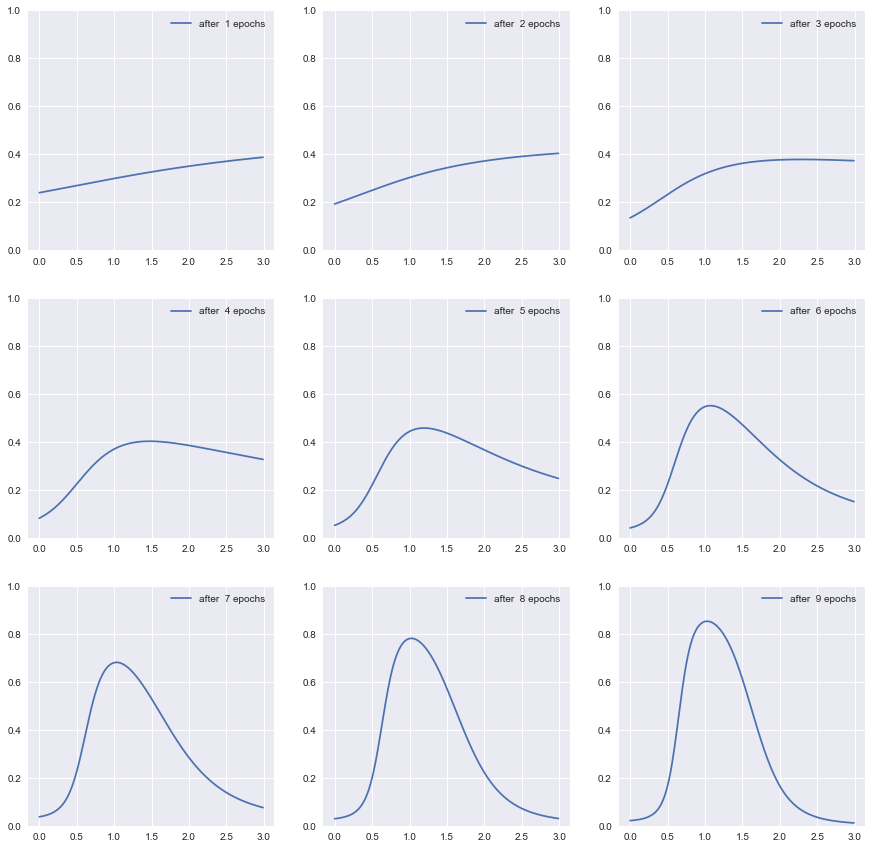

In [183]:
model_versicolor = initialize_versicolor_model(lr = .1)
n_rows = n_cols = 3
fig = plt.subplots(n_rows,n_cols,figsize=(15,15),sharex=True,sharey=True)
epochs=100
petal_widths = np.arange(0,3,0.01)
for i in range(1,n_rows**2+1):
    plt.subplot(n_rows,n_cols, i)
    model_versicolor.fit(x_train,y_train,epochs=150,verbose=0)
    probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='after  {} epochs'.format(i))
    plt.ylim((0,1))
    plt.legend()

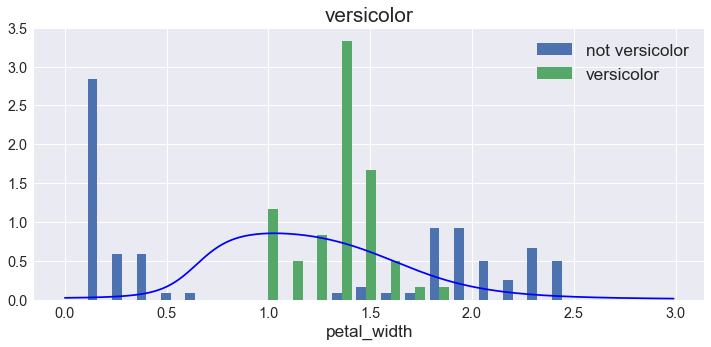

In [189]:
plot_histogram('versicolor','petal_width',normed=True)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
_=plt.plot(petal_widths,probas,'b',label='after  {} epochs'.format(i))